# IBM Coursera Advanced Data Science Capstone

### Wali Farooqui

# Credit Card Fraud Detection

As the name suggests, I am going build a model to detect credit card fraud. Credit Card Fraud Detection models help credit card issuers to protect their customers from any illegitimate transactions. This is nothing but anamoly detection based on spending/usage behaviour of any customer, we can predict or classify any transaction fraudulent based on the our model.

In this notebook, I will build several models and compare their performance & accuracy and finally choose appropriate model which is best suited for the above mentioned purpose.

## Goal

In this notebook, I will try to address following.

- To detect anamoly and flag it as fraud.
- Understand and perform comparative study of the several ML/DL algorithms.
- Build models and evaluate performance and accuracy.
- Validate the model

## Data

Understanding data is one of the most important part when designing any machine learning algorithm. In this notebook, I will use  credit card fraud dataset from https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3. Kaggle is the one most popular platform for data science and machine learning enthusiast to learn and test their skillset.

## Data Schema

Dataset obtained from kaggle is pre-cleaned and ready for building model. Further, The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

### Building and Setting Up Dataset

Download kaggle dataset directly and import it into the project.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
df_credit = pd.read_csv("creditcard.csv")

In [3]:
#check shape of the DataFrame
df_credit.shape

(284807, 31)

In [4]:
#check for columns
df_credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here, columns V1, V2, V3, ...... V27, V28 are results of dimensionality reduction using PCA to protect senstitive information information involved in credit transaction. For instance, we don't want to have identity or location of the credit card holder. Further, we have time and amount of each transactions, and Class of the each transactions labeled as 1 for fraud and 0 for otherwise.

In [5]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Here we can notice that count for each column is same, so it means there is no missing value in the dataset.
- We have max value for Class column to be 1 (fraud) and min value 0(not fraud).
- We have mean for the Class column 0.001727, which is closer to zero it means, dataset less fraudulent transactions than legitimate transactions. But imbalance ration is high since Class column has only binary value.

## Data Visualization

We have 284807 rows in the dataset, we can analyze data using a random subset to reduce computation cost.

In [6]:
#Random Subset of the data

data_subset = df_credit.sample(frac = 0.1, random_state =1)
data_subset.shape

(28481, 31)

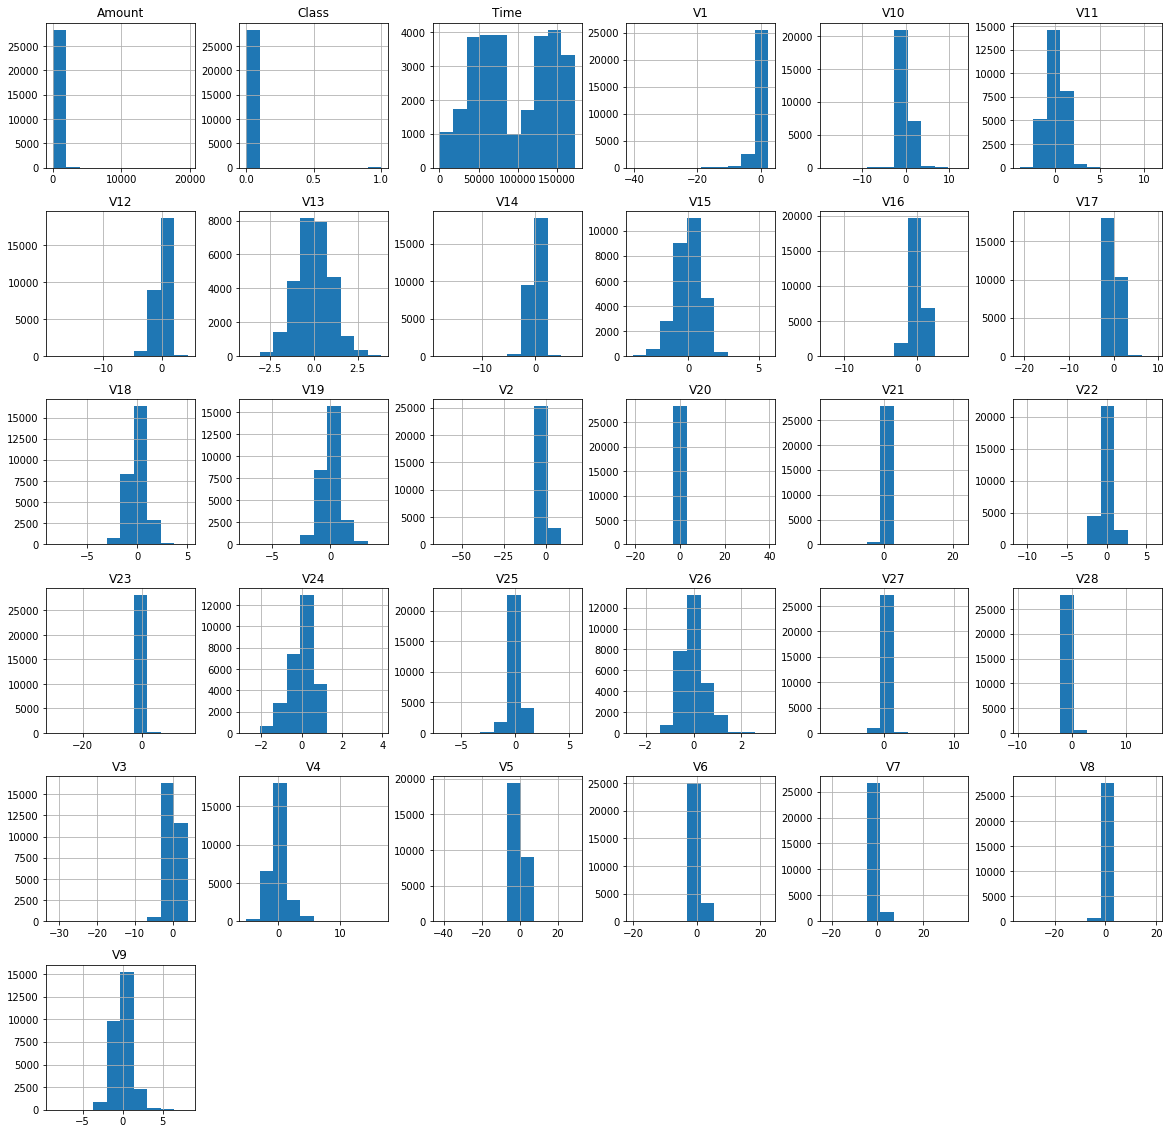

In [7]:
# Plot Histogramof each parameters

data_subset.hist(figsize=(20,20))
plt.show()

In [8]:
#Determine number of fraud cases in dataset

Fraud = data_subset[data_subset['Class']==1]
Valid = data_subset[data_subset['Class']==0]

outlier_fraction = float(len(Fraud))/len(Valid) # Imbalance Ratio

print("Fraud Case: {0}, Valid Cases: {1} and Outlier Fraction: {2}".format(len(Fraud),len(Valid),outlier_fraction))

Fraud Case: 49, Valid Cases: 28432 and Outlier Fraction: 0.0017234102419808666


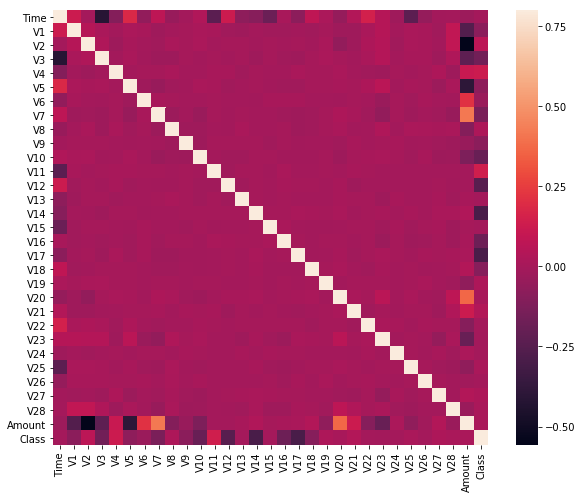

In [9]:
#Lets check Correlation Matrix

corr_mat = data_subset.corr()

fig = plt.figure(figsize = (10,8))

sns.heatmap(corr_mat, vmax=.8, square = True)
plt.show()


In [10]:
# break data into independent and dependent column variable
columns = df_credit.columns

X = df_credit[columns[:len(columns)-1]]
Y = df_credit[columns[-1]]




## ML Algorithms

Now we can select an algorithm to build our model. The most common used algorithm for outlier detections are "Local Outlier Factor" and "Isolation Forest", SVM is also used but it increases computional cost when applied on large dataset. For reference and understanding of the said algorithms visit:
https://scikit-learn.org/stable/modules/outlier_detection.html

<b>Local Outlier Factor</b>- is an unsupervised outlier detection method, it calculates anomaly score of each sample and recall local outlier factor, so it measures the deviation of density of given sample with respect to iys neighbors. It is similar to K nearest neighbors method.

<b>Isolation Forest</b> - It returns anomaly score of each sample using isolating observations by randomly selecting a feature and then randomly slecting a split value between maximum and minimum value of the selected feature.

In [11]:
#Import Packages for ML algorithms
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle





### Normalize and Scale Data

Both time and amount have very different magnitudes, which will likely result in the large magnitude value "washing out" the small magnitude value. It is therefore common to scale the data to similar magnitudes. Most of the data (other than 'time' and 'amount') result from the product of a PCA analysis. The PCA done on the dataset transformed it into standard-normal form. I will do the same to the 'time' and 'amount' columns.


In [12]:
# define a random state
state = 1
#define the outlier detection methods

classifier = ['IsolationForest', 'LocalOutlierFactor']

# Normalize and scale time and amount

df_normalized = df_credit
df_normalized['Time'] = StandardScaler().fit_transform(df_normalized['Time'].values.reshape(-1, 1))
df_normalized['Amount'] = StandardScaler().fit_transform(df_normalized['Amount'].values.reshape(-1, 1))

# generate training and test sets

X_train, X_test = train_test_split(df_normalized, test_size=0.2, random_state=416)
X_train = X_train[X_train.Class == 0]
Y_train = X_train['Class']
X_train = X_train.drop(['Class'], axis=1) 


Y_test = X_test['Class'] 
X_test = X_test.drop(['Class'], axis=1) 

X_train = X_train.values
X_test = X_test.values

In [13]:
# fit the model

for i in classifier:
    if i is 'LocalOutlierFactor':
        clf = LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction,  novelty=True)
        clf.fit(X_train)
        filename = 'LocalOutlierFactor.sav'
        pickle.dump(clf, open(filename, 'wb'))
        
    else:
        clf = IsolationForest(max_samples = len(X_train), contamination = outlier_fraction, random_state = state)
        clf.fit(X_train)
        filename = 'IsolationForest.sav'
        pickle.dump(clf, open(filename, 'wb'))
        
        
   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [14]:
model_AUPRC = {}
confusionMatrix = {}

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


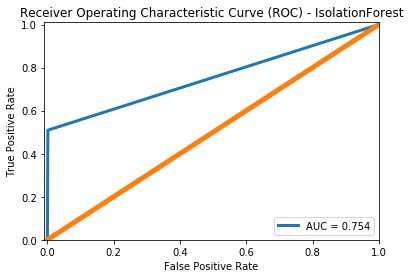

IsolationForest
Accuracy: 0.9976475545100242
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.40      0.51      0.45       108

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.70      0.75      0.72     56962
weighted avg       1.00      1.00      1.00     56962



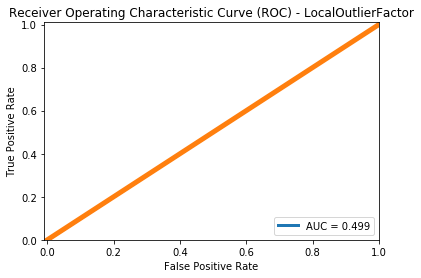

LocalOutlierFactor
Accuracy: 0.99626066500474
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.00      0.00      0.00       108

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
for i in classifier:
    
    if i is 'LocalOutlierFactor':
        loaded_model = pickle.load(open(i+'.sav', 'rb'))
        y_hat = loaded_model.predict(X_test)
        scores_pred = loaded_model.negative_outlier_factor_
    else:
        loaded_model = pickle.load(open(i+'.sav', 'rb'))
        y_hat = loaded_model.predict(X_test)
        scores_pred = loaded_model.decision_function(X_test)
    #rehsape the prediction values to 0 for legitimate and 1 for fraud
    
    y_hat[y_hat==1] = 0
    y_hat[y_hat==-1] = 1
    
    
    #classification Matrix
 
    false_pos_rate, true_pos_rate, thresholds = roc_curve(Y_test, y_hat)
    roc_auc = auc(false_pos_rate, true_pos_rate,)

    plt.plot(false_pos_rate, true_pos_rate, linewidth=3, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)

    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristic Curve (ROC) - '+i)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    model_AUPRC[i]= roc_auc
    print(i)
    print("Accuracy: {}".format(accuracy_score(Y_test,y_hat)))
    print(classification_report(Y_test, y_hat))
    confusionMatrix[i] = confusion_matrix(Y_test, y_hat)

### Model Performance
Here we can see that <b> Isolation Forest </b>[99.76%] and <b> Local Outlier Factor </b>[99.62%] performed prettygood in terms of accuracy, but if we measure precision and recall then we can say that Isolation Forest performed better than other while detecting fraudulent transaction.

Since dataset has huge imbalance ratio in target variable, so we can say accuracy is not a better metrics to comment on any model. Area under the curve is being widely used to determine model's performance. For more info http://gim.unmc.edu/dxtests/roc3.htm

We can notice that Area under ROC curve is 0.500 for IsolationForest and 0.500 for LocalOutlierFactor, we can apprehend that these two will not perform better at detecting fraud. Let's try few deep learning models.

# Deep Learning Model

In [16]:
#import required packages

from sklearn.metrics import mean_squared_error
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers


Using TensorFlow backend.


lets visualize dataset a bit more using subset of the data.

Text(0, 0.5, 'Number of Observations')

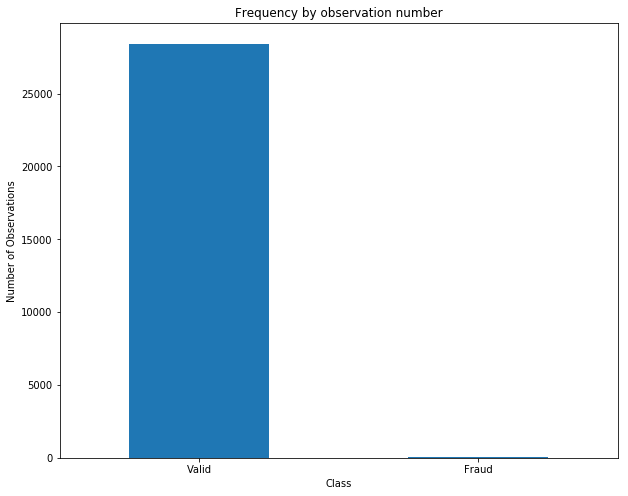

In [88]:
fig = plt.figure(figsize = (10,8))
count_classes = pd.value_counts(data_subset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Valid', 'Fraud'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

Now I would like to dig deep and visualize amount vs percentage of transactions based on amount. Further, low amount may be less significant than high value fraud, I will visualize data for more than 100 units.  

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


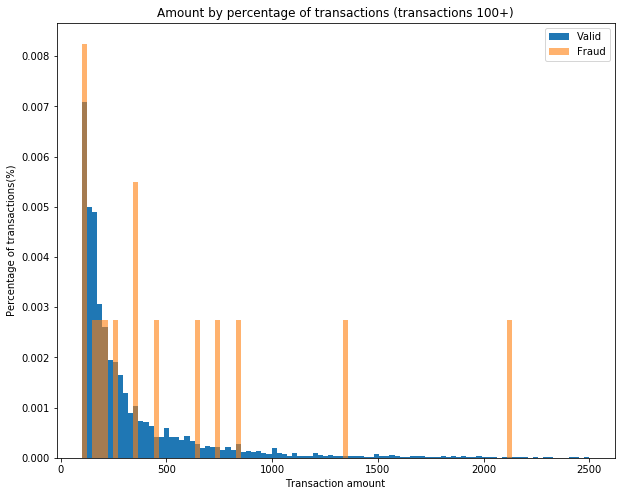

In [18]:
fig = plt.figure(figsize = (10,8))
bins = np.linspace(100, 2500, 100)
plt.hist(data_subset[data_subset.Class == 0].Amount, bins, alpha=1, normed=True, label='Valid')
plt.hist(data_subset[data_subset.Class == 1].Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions 100+)")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions(%)");
plt.show()

We can analysis from given subset that there are very few fraud cases and mostly are amount below 1000, we are not able to see any pattern in the anamoly. Lets try few models.

## Basic Autoencoder

Below we set up the structure of the autoencoder. It has symmetric encoding and decoding layers that are "dense" (e.g. full connected). The choice of the size of these layers is relatively arbitrary and generally the coder experiments with a few different layer sizes.

Remember you are reducing the input into some form of simplified encoding and then expanding it again. The input and output dimension is the feature space (e.g. 30 columns), so the encoding layer should be smaller by an amount that I expect to represent some feature. In this case, I am encoding 30 columns into 14 dimensions so I am expecting high-level features to be represented by roughly two columns (30/14 = 2.1). Of those high-level features, I am expecting them to map to roughly seven hidden/latent features in the data.

In [19]:
#Variable to store history

history = {}

In [20]:
epochs = 50
batch_size = 80
input_dim = X_train.shape[1]
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


W0628 23:03:10.103091 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 23:03:10.732365 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 23:03:10.914384 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [21]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

    
cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history['AutoEncoder'] = autoencoder.fit(X_train, X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

W0628 23:03:11.212856 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 23:03:26.090214 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0628 23:03:26.268090 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 227461 samples, validate on 56962 samples


W0628 23:03:27.481802 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0628 23:03:27.481802 10800 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/50
227461/227461 [==============================] - 7s 29us/step - loss: 0.8319 - acc: 0.5360 - val_loss: 0.7957 - val_acc: 0.6059
Epoch 2/50
227461/227461 [==============================] - 6s 24us/step - loss: 0.7494 - acc: 0.6149 - val_loss: 0.7707 - val_acc: 0.6265
Epoch 3/50
227461/227461 [==============================] - 5s 24us/step - loss: 0.7340 - acc: 0.6361 - val_loss: 0.7604 - val_acc: 0.6468
Epoch 4/50
227461/227461 [==============================] - 6s 25us/step - loss: 0.7269 - acc: 0.6489 - val_loss: 0.7557 - val_acc: 0.6526
Epoch 5/50
227461/227461 [==============================] - 5s 24us/step - loss: 0.7229 - acc: 0.6587 - val_loss: 0.7519 - val_acc: 0.6640
Epoch 6/50
227461/227461 [==============================] - 5s 24us/step - loss: 0.7200 - acc: 0.6671 - val_loss: 0.7488 - val_acc: 0.6751
Epoch 7/50
227461/227461 [==============================] - 6s 26us/step - loss: 0.7172 - acc: 0.6735 - val_loss: 0.7466 - val_acc: 0.6739
Epoch 8/50
227461/227461 [=

In [22]:
autoencoder = load_model('autoencoder_fraud.h5')

In [23]:
X_test_predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_predictions, 2), axis=1)
error_df_en = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': Y_test})
error_df_en.describe()

,Reconstruction_error,True_class
count,56962.000000,56962.000000
mean,0.723436,0.001896
std,3.557503,0.043502
min,0.045578,0.000000
25%,0.242547,0.000000
50%,0.401472,0.000000
75%,0.623636,0.000000
max,407.018900,1.000000


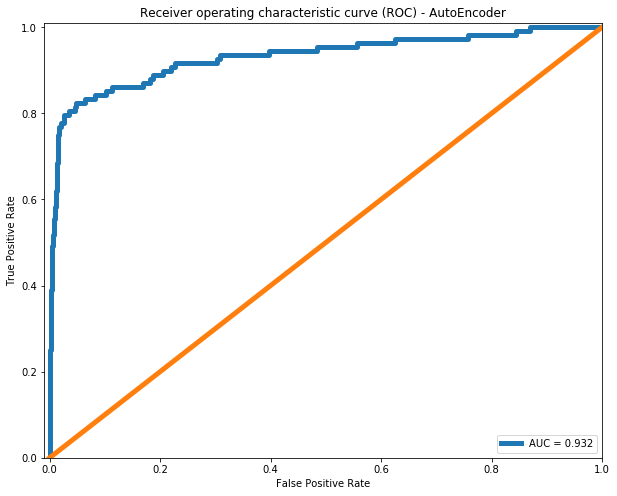

In [86]:
#AUPRC
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df_en.True_class, error_df_en.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)
plt.figure(figsize=(10, 8))
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) - AutoEncoder')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

model_AUPRC['AutoEncoder'] = roc_auc

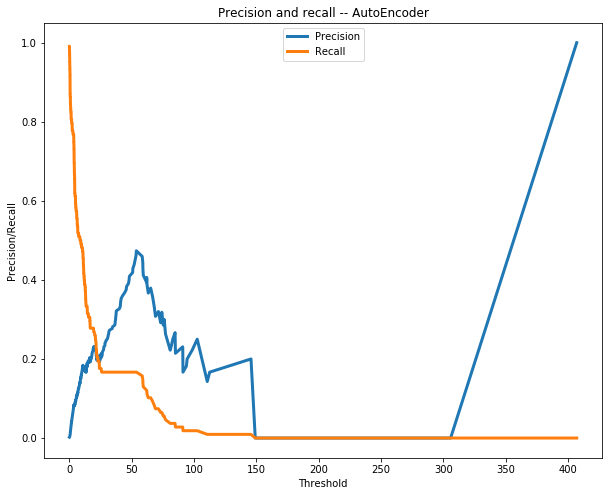

In [85]:
#Precision/Recall vs threshold

precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df_en.True_class, error_df_en.Reconstruction_error)
plt.figure(figsize=(10, 8))
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=3)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=3)
plt.title('Precision and recall -- AutoEncoder')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

### Precision, Recall and Threshold

Precision and recall are the eternal tradeoff in data science, so at some point we have to draw an arbitrary line, or a threshold. Where this line will be drawn is essentially a business decision. In this case, we are trading off the cost between missing a fraudulent transaction and the cost of falsely flagging the transaction as a fraudulent even when it is not. Add those two weights to the calculation and we can come up with some theoretical optimal solution. This is rarely the way it is done in practice, however, as it is hard to quantify a lot of those costs (such as customer annoyance at getting fraud alerts too frequently), or because of various structural, technical, or business rules preventing the optimized solution from being chosen

In [26]:
#This is here business decision is taken, threshold has to be choosen, for instance let take it to be 5

pred_y = [1 if e > 5 else 0 for e in error_df_en.Reconstruction_error.values]
confusionMatrix['AutoEncoder'] = confusion_matrix(error_df_en.True_class, pred_y)


## Basic LSTM

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.models import model_from_json

In [62]:
number_of_epochs = 50

Xtrain = X_train.reshape(227461, 1, 30)
Xtest = X_test.reshape(56962, 1, 30)

In [63]:
# design network
from keras import optimizers
sgd = optimizers.SGD(lr=1e-5, clipnorm=1.)
model = Sequential()
model.add(LSTM(units = 30, input_shape = (1,30), activation='relu', return_sequences=False)) 
model.add(Dropout(0.2))
model.add(Dense(30, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
history['LSTM'] = model.fit(Xtrain, Y_train, epochs=number_of_epochs, batch_size=124, validation_data=(Xtrain, Y_train), verbose=0, shuffle=True).history



In [64]:

model.save("lstm_model.h5")

In [65]:
# load model
lstm_model = load_model('lstm_model.h5')

In [32]:
# The code was removed by Watson Studio for sharing.

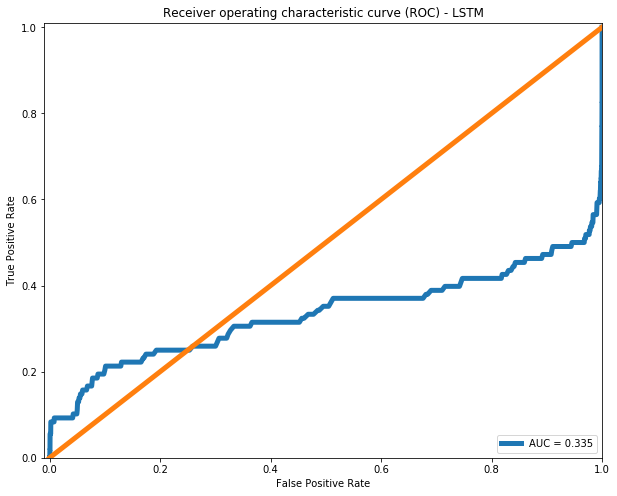

In [89]:
# Evaluate and predict Model

Y_pred = lstm_model.predict(Xtest)


#AUPRC
false_pos_rate, true_pos_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate,)
plt.figure(figsize=(10, 8))
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC) - LSTM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

model_AUPRC['LSTM'] = roc_auc

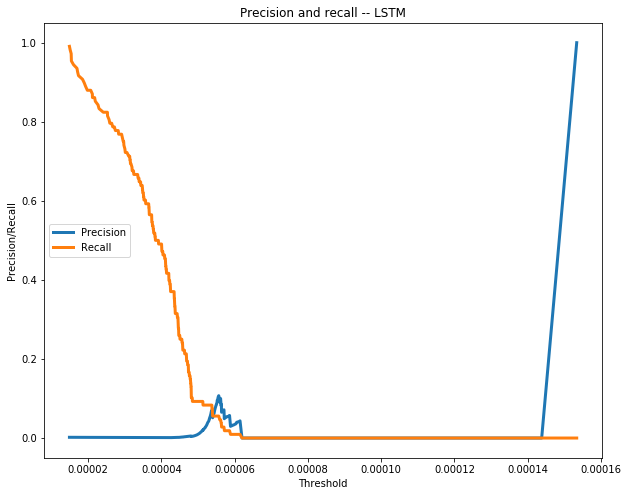

In [91]:
#Precision/Recall vs threshold

precision_rt, recall_rt, threshold_rt = precision_recall_curve(Y_test, Y_pred)
plt.figure(figsize=(10, 8))
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=3)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=3)
plt.title('Precision and recall -- LSTM')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [105]:
#Take threshold value 0.00001


pred_y = [0 if e >  0.00002 else 1 for e in Y_pred]

confusionMatrix['LSTM'] = confusion_matrix(Y_test, pred_y)


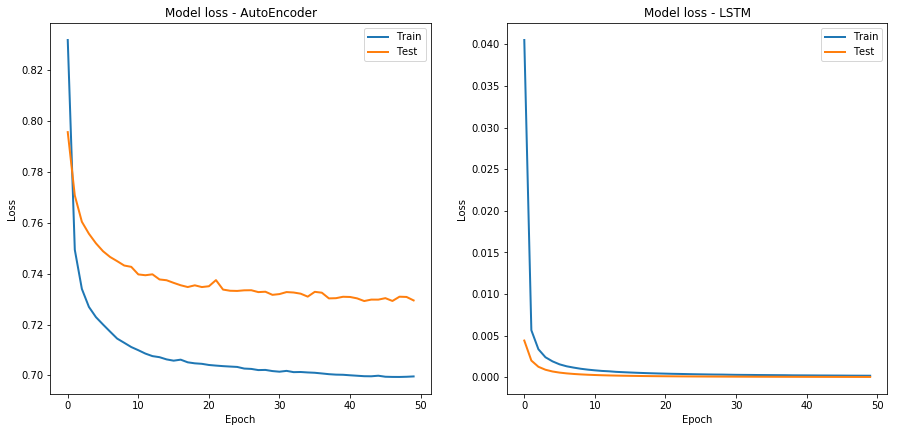

In [68]:
#Comaprative Model Loss
fig = plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.plot(history['AutoEncoder']['loss'], linewidth=2, label='Train')
plt.plot(history['AutoEncoder']['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss - AutoEncoder')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.subplot(2,2,2)
plt.plot(history['LSTM']['loss'], linewidth=2, label='Train')
plt.plot(history['LSTM']['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss - LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

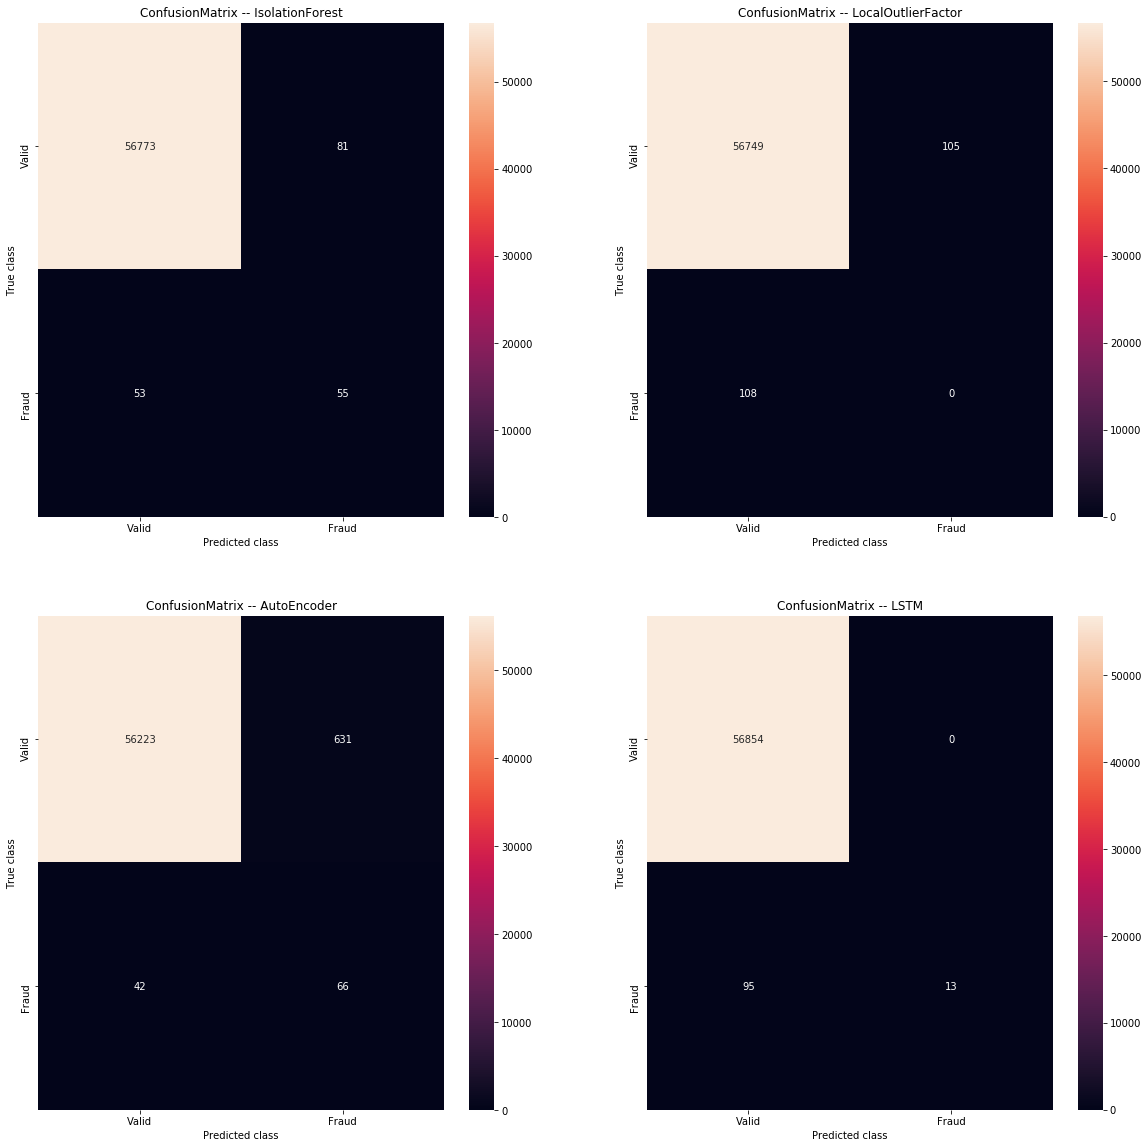

In [106]:
#Compare Confusion Matrix
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
sns.heatmap(confusionMatrix['IsolationForest'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title("Confusion matrix -- IsolationForest")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ConfusionMatrix -- IsolationForest')

plt.subplot(2, 2, 2)
sns.heatmap(confusionMatrix['LocalOutlierFactor'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title("Confusion matrix -- LocalOutlierFactor")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ConfusionMatrix -- LocalOutlierFactor')

plt.subplot(2, 2, 3)
sns.heatmap(confusionMatrix['AutoEncoder'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title("Confusion matrix -- AutoEncoder")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ConfusionMatrix -- AutoEncoder')

plt.subplot(2, 2, 4)
sns.heatmap(confusionMatrix['LSTM'], xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'], annot=True, fmt="d")
plt.title("Confusion matrix -- LSTM")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ConfusionMatrix -- LSTM')

plt.show()

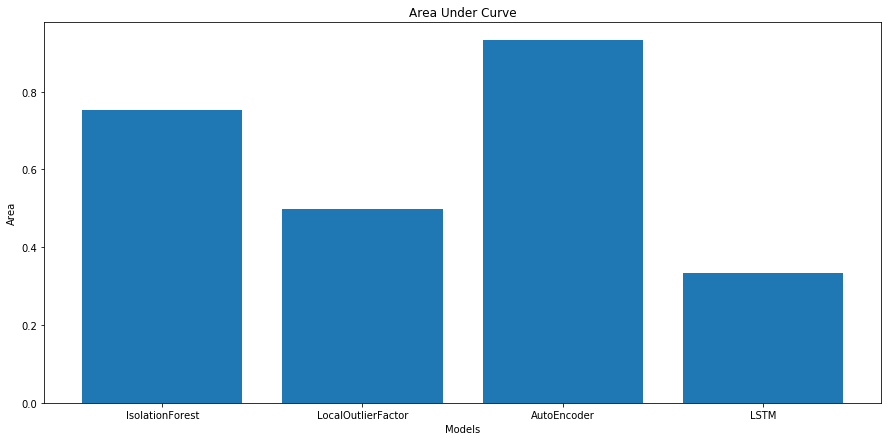

In [111]:
# Compare Area Under ROC
plt.figure(figsize=(15, 7))
plt.ylabel('Area')
plt.xlabel('Models')
plt.title('Area Under Curve')

plt.bar(model_AUPRC.keys(), model_AUPRC.values())
plt.show()

## Conclusion

I have build model using 4 different algorithms on the dataset, based on basic implementation of the model, we can say AutoEncoder model outperforms all other methods of outlier detection used in this notebook.

Although, loss of the Autoencoder model started converging in 50 epochs and it has very good Area Under Curve which is best suitable parameter to measure performance of the model if dataset has huge imbalance ration in target variable.

Further, parameters in LSTM model can further be tuned for better results. And based on analysis in this notebook it is highly unlikely that Local Outlier Factor method work well with dataset with high imbalance ration. Isolation Forest performed considerably good, and it can also been tuned.

I think AutoEncoder is very good anamoly detection method in cases with high imbalance ratio in dataset.